### Data-driven prediction of energy use of appliances and lights
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. \

Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters). \



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)  # Display all columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Appliance Energy Prediction/energydata_complete.csv')

In [ ]:
# About this dataframe
'''date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH1, Humidity in kitchen area, in % 
T2, Temperature in living room area, in Celsius 
RH2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH3, Humidity in laundry room area, in % 
T4, Temperature in office room, in Celsius 
RH4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH5, Humidity in bathroom, in % 
T6, Temperature outside the building (north side), in Celsius 
RH6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH7, Humidity in ironing room, in % 
T8, Temperature in teenager room 2, in Celsius 
RH8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH9, Humidity in parents room, in % 
To, Temperature outside (from Chievres weather station), in Celsius 
Pressure (from Chievres weather station), in mm Hg 
RHout, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data'''
df1 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [ ]:
df1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df_final = df1.rename(columns={'T1':'Kitchen_temp', 'RH_1':'Kitchen_humidity', 'T2':'Liv_room_temp', 'RH_2':'Liv_room_humidity', 'T3':'Laundary_room_temp.',
       'RH_3':'Laundary_room_humidity', 'T4':'Office_room_temp', 'RH_4':'Office_room_humd', 'T5':'bathroom_temp', 'RH_5':'bathroom_humd', 'T6':'Outside_build_temp', 'RH_6':'Outside_build_humd', 'T7':'iron_room_temp', 'RH_7':'iron_room_humd', 'T8':'teen_room_temp',
       'RH_8':'teen_room_humd', 'T9':'parent_room_temp', 'RH_9':'parent_room_humd'})

In [ ]:
df_final.head()

,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df_final.tail()

,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27-05-2016 18:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    19735 non-null  object 
 1   Appliances              19735 non-null  int64  
 2   lights                  19735 non-null  int64  
 3   Kitchen_temp            19735 non-null  float64
 4   Kitchen_humidity        19735 non-null  float64
 5   Liv_room_temp           19735 non-null  float64
 6   Liv_room_humidity       19735 non-null  float64
 7   Laundary_room_temp.     19735 non-null  float64
 8   Laundary_room_humidity  19735 non-null  float64
 9   Office_room_temp        19735 non-null  float64
 10  Office_room_humd        19735 non-null  float64
 11  bathroom_temp           19735 non-null  float64
 12  bathroom_humd           19735 non-null  float64
 13  Outside_build_temp      19735 non-null  float64
 14  Outside_build_humd      19735 non-null

In [ ]:
df_final.describe()

,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df_final['Total_energy_use(Wh)'] = df_final['Appliances'] + df_final['lights']
df_final['date'] = pd.to_datetime(df_final['date'])
#df_final['time'] = df_final['date'].dt.time

In [ ]:
#df_final['time'] = df_final['time'].astype(str)
df_final['date'] = df_final['date'].astype(str)
df_final.head()


,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Total_energy_use(Wh)
0,2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90
1,2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90
2,2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80
3,2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,90
4,2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100


In [ ]:
df_corr = df_final.corr()

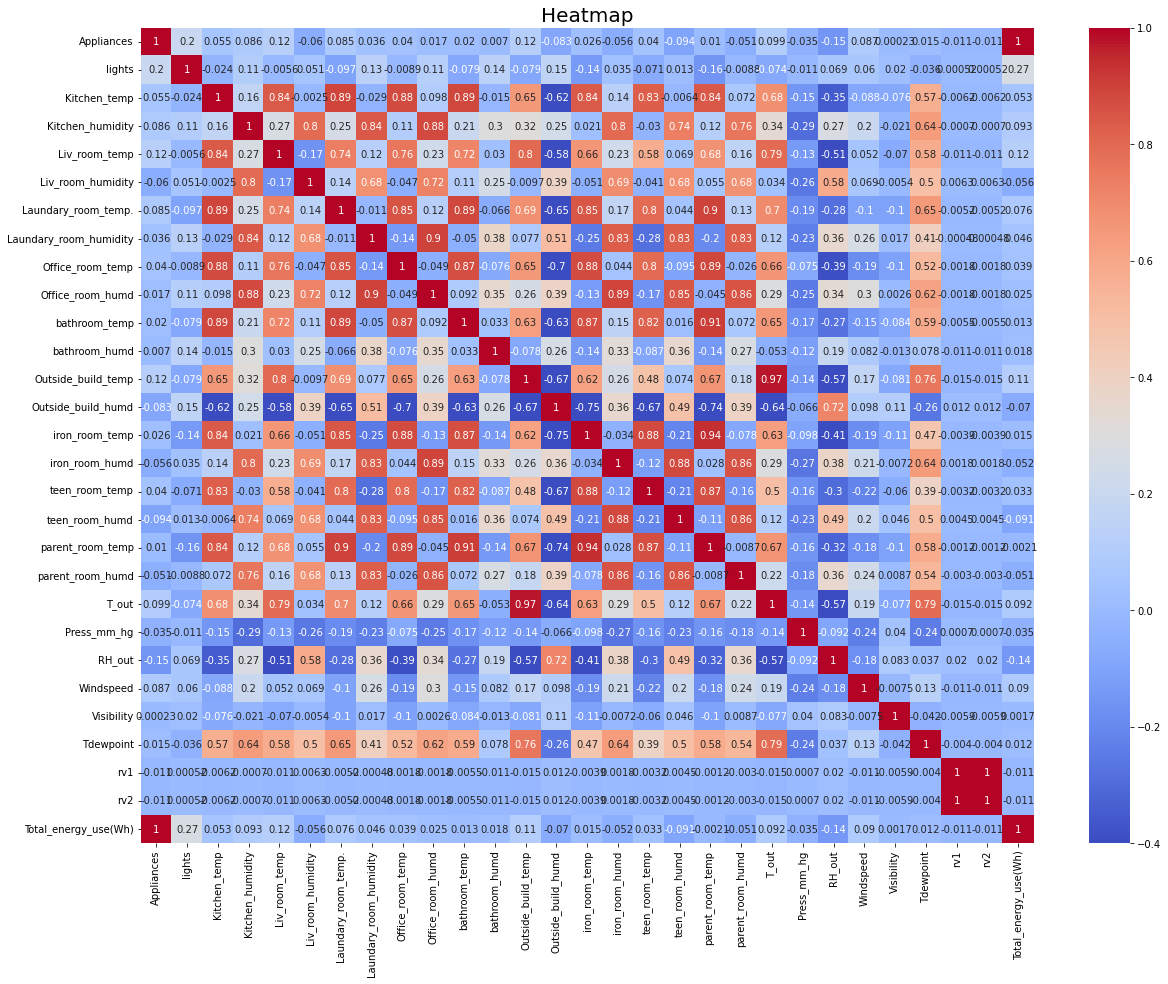

In [ ]:
sns.heatmap(df_final.corr(), vmin=-0.4, cmap='coolwarm', annot=True)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (30, 15)
plt.show()

### Deciding important columns

In [ ]:
imp = df_corr[28:29]
col_value = []
for col in imp.iloc[0,:]:
    col_value.append(col)
pos_values = []
for val in col_value:
    if val>=0.05 and val<=1:
        pos_values.append(val)
pos_values
neg_values = []
for val2 in col_value:
    if val2<0 and val2<=(-0.05):
        neg_values.append(val2)
print(pos_values)
print(neg_values)

[0.9972183968614697, 0.26979904428887835, 0.052672770301151015, 0.09263444403860481, 0.11751091572984859, 0.07614278467856811, 0.10953754350231402, 0.09173337409257946, 0.09015615193403718, 1.0]
[-0.055513320376145134, -0.0700086949095597, -0.051986779792846785, -0.09138463580904051, -0.051213457455329965, -0.14436347760288706]


In [ ]:
# important columns
pos_col = []
for col in imp.columns:
    if imp.loc[:,[col]].iat[0,0] in pos_values:
        pos_col.append(col)
   
neg_col = []
for col in imp.columns:
    if imp.loc[:,[col]].iat[0,0] in neg_values:
        neg_col.append(col)

final_imp_col = pos_col + neg_col
final_imp_col

['Appliances',
 'lights',
 'Kitchen_temp',
 'Kitchen_humidity',
 'Liv_room_temp',
 'Laundary_room_temp.',
 'Outside_build_temp',
 'T_out',
 'Windspeed',
 'Total_energy_use(Wh)',
 'Liv_room_humidity',
 'Outside_build_humd',
 'iron_room_humd',
 'teen_room_humd',
 'parent_room_humd',
 'RH_out']

In [ ]:
df_final2 = df_final.loc[:,final_imp_col]
df_final2.drop(['Appliances','lights'],axis=1)

,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Laundary_room_temp.,Outside_build_temp,T_out,Windspeed,Total_energy_use(Wh),Liv_room_humidity,Outside_build_humd,iron_room_humd,teen_room_humd,parent_room_humd,RH_out
0,19.890000,47.596667,19.200000,19.790000,7.026667,6.60,7.000000,90,44.790000,84.256667,41.626667,48.900000,45.5300,92.000000
1,19.890000,46.693333,19.200000,19.790000,6.833333,6.48,6.666667,90,44.722500,84.063333,41.560000,48.863333,45.5600,92.000000
2,19.890000,46.300000,19.200000,19.790000,6.560000,6.37,6.333333,80,44.626667,83.156667,41.433333,48.730000,45.5000,92.000000
3,19.890000,46.066667,19.200000,19.790000,6.433333,6.25,6.000000,90,44.590000,83.423333,41.290000,48.590000,45.4000,92.000000
4,19.890000,46.333333,19.200000,19.790000,6.366667,6.13,5.666667,100,44.530000,84.893333,41.230000,48.590000,45.4000,92.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,27.200000,24.796667,22.70,3.333333,100,42.025714,1.000000,44.500000,50.074000,46.7900,55.666667
19731,25.500000,46.500000,25.754000,27.133333,24.196667,22.60,3.500000,90,42.080000,1.000000,44.414286,49.790000,46.7900,56.000000
19732,25.500000,46.596667,25.628571,27.050000,23.626667,22.50,3.666667,280,42.768571,1.000000,44.400000,49.660000,46.7900,56.333333
19733,25.500000,46.990000,25.414000,26.890000,22.433333,22.30,3.833333,430,43.036000,1.000000,44.295714,49.518750,46.8175,56.666667


In [ ]:
# Extracting independent columns
col_list = []
for e in list(df_final2.columns):
    col_list.append(e)
list2 = ['Appliances','lights','Total_energy_use(Wh)']
for e in list2:
    col_list.remove(e)    
print(col_list)

['Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp', 'Laundary_room_temp.', 'Outside_build_temp', 'T_out', 'Windspeed', 'Liv_room_humidity', 'Outside_build_humd', 'iron_room_humd', 'teen_room_humd', 'parent_room_humd', 'RH_out']


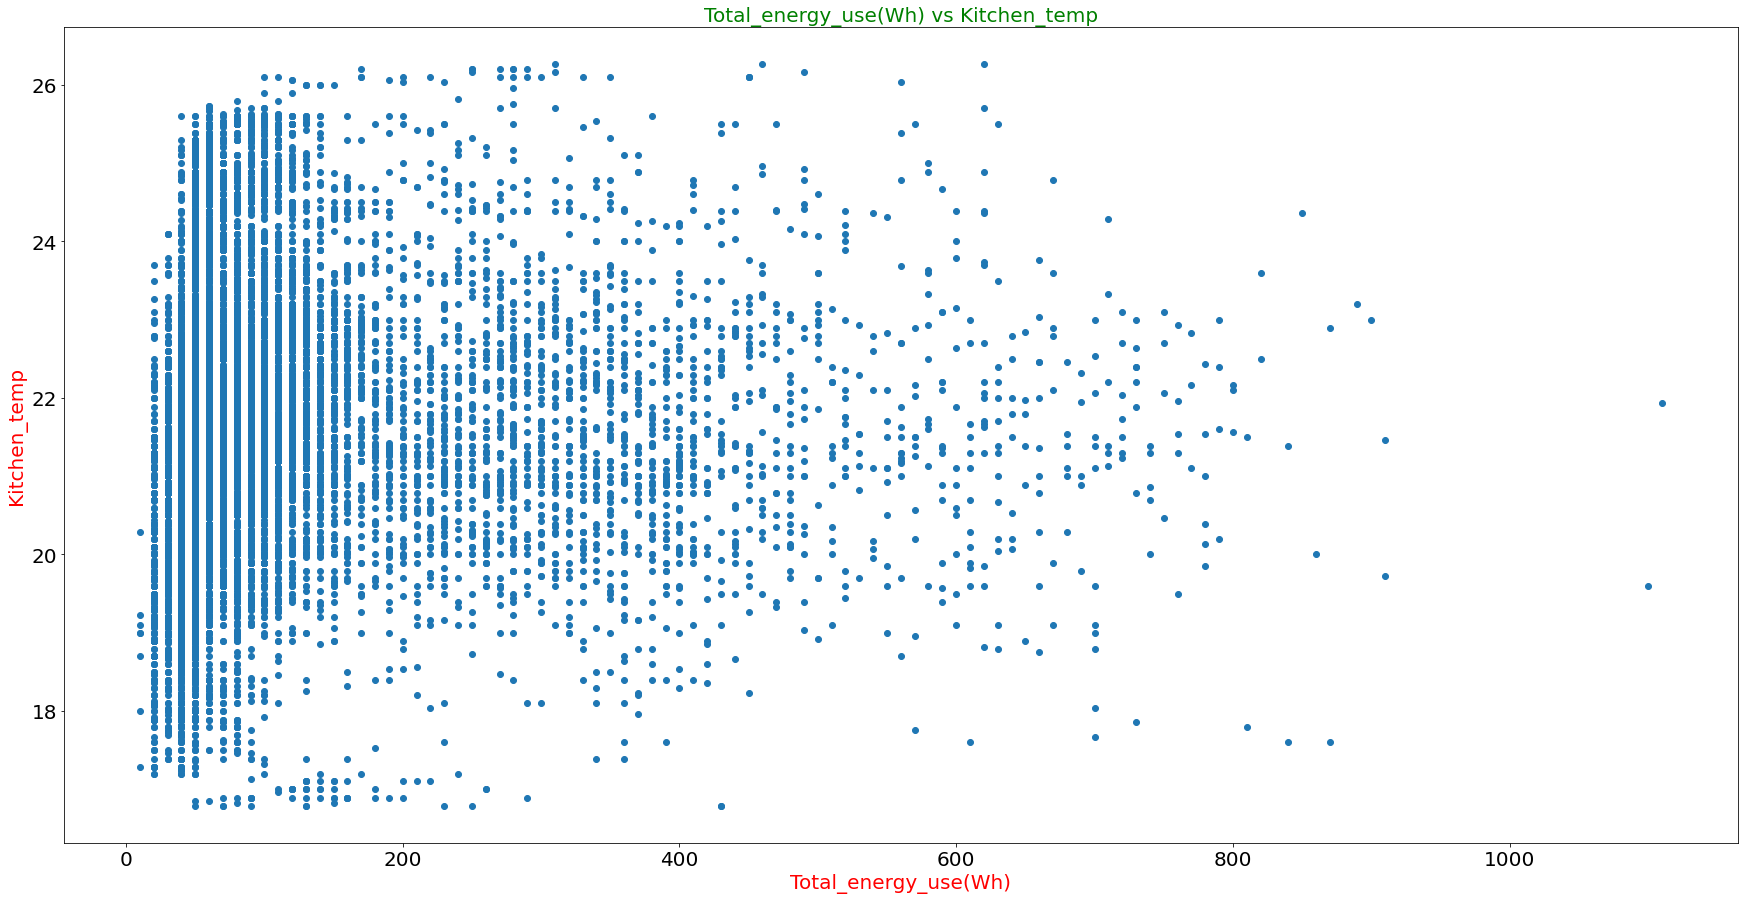

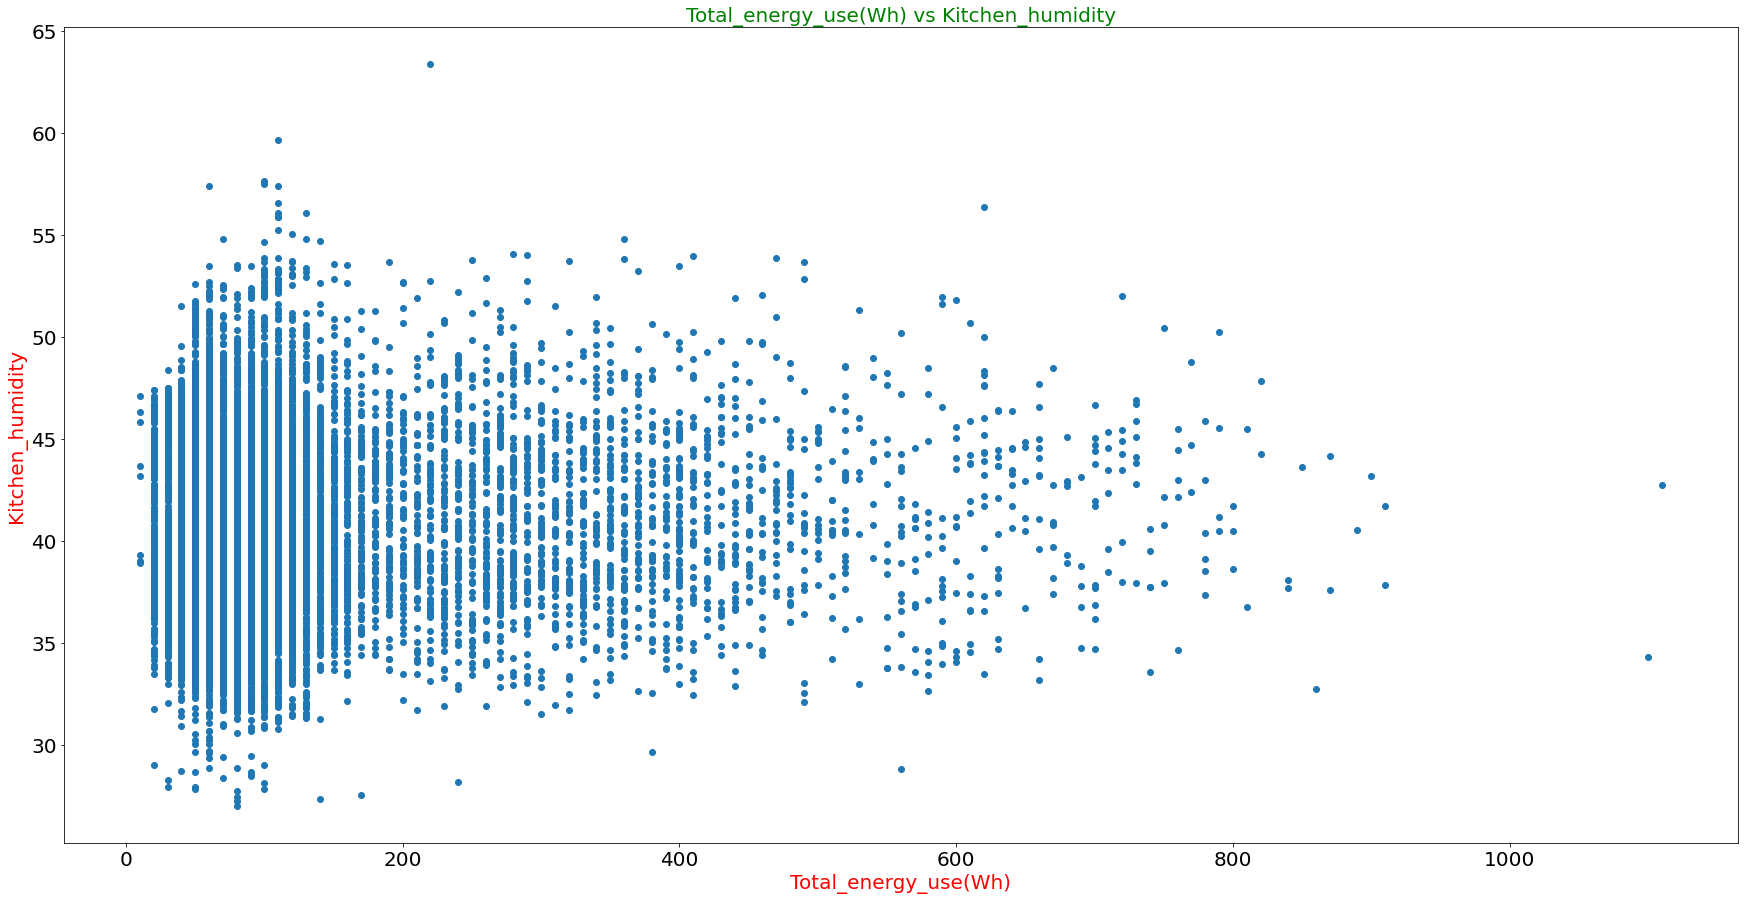

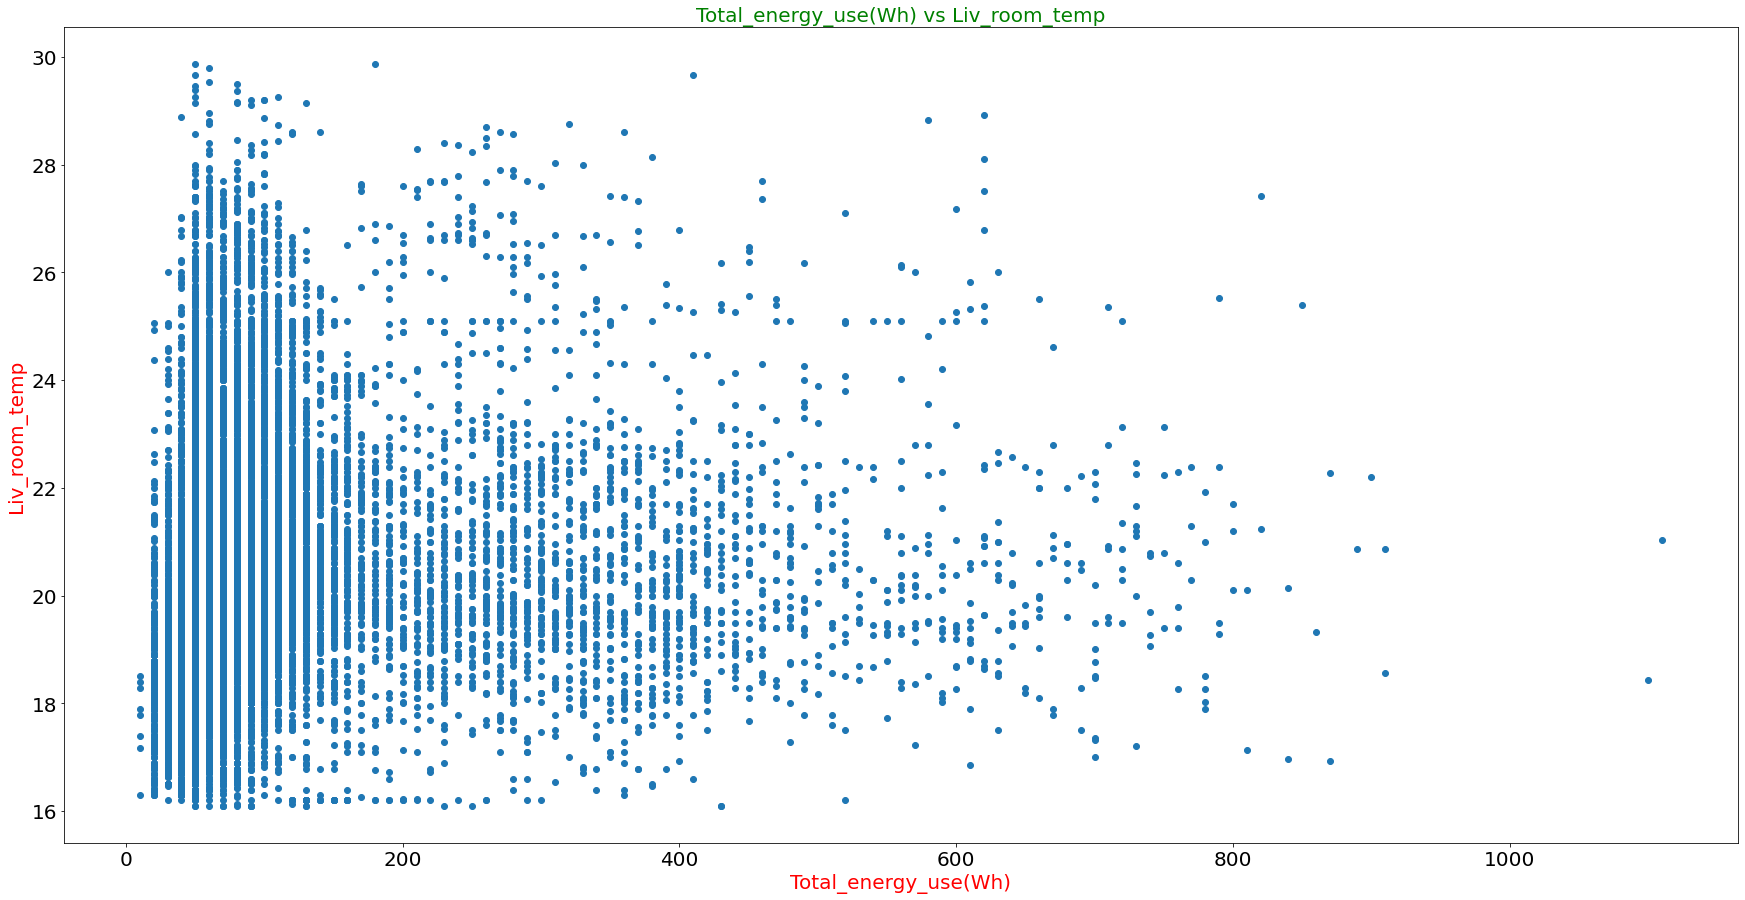

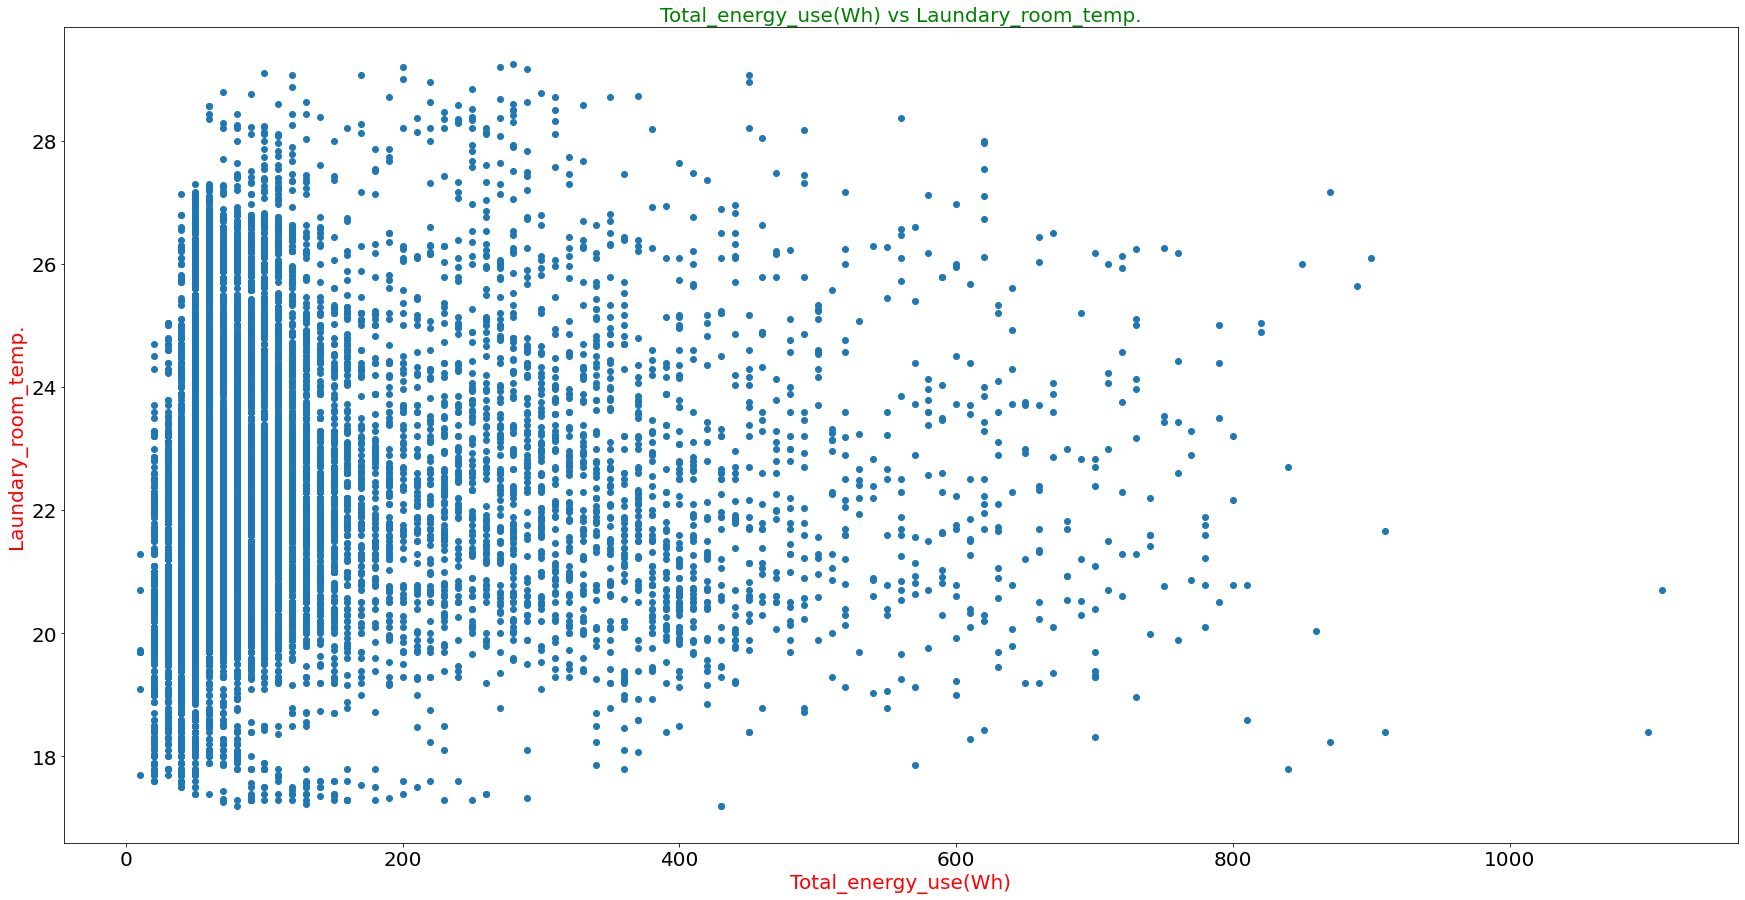

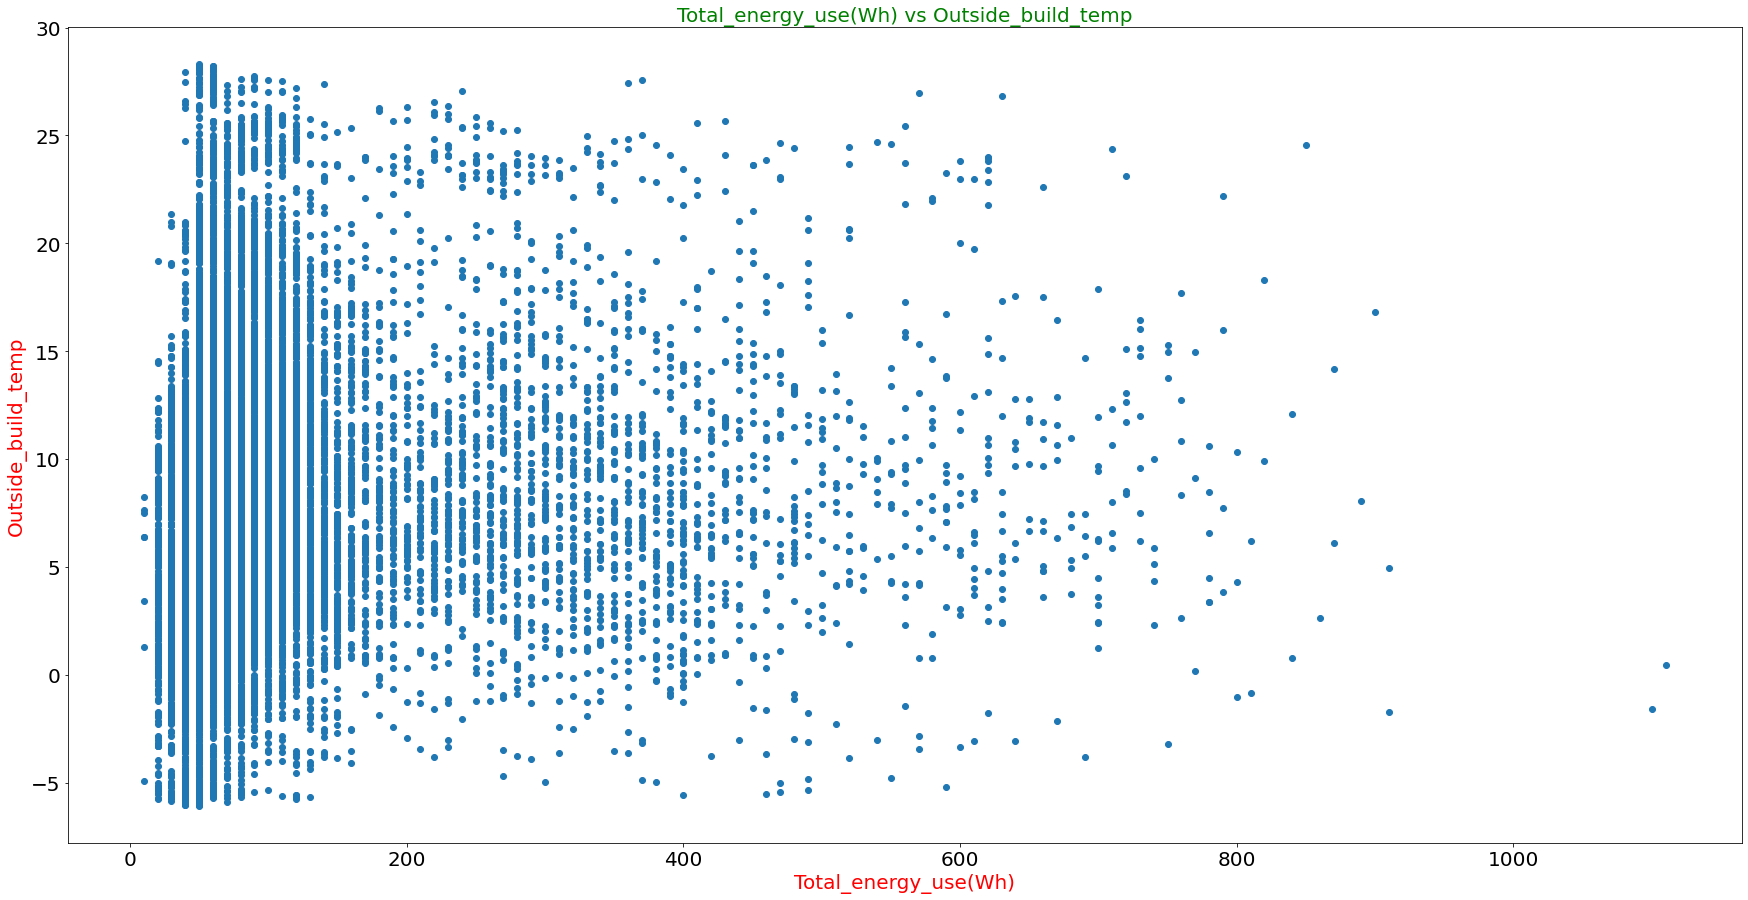

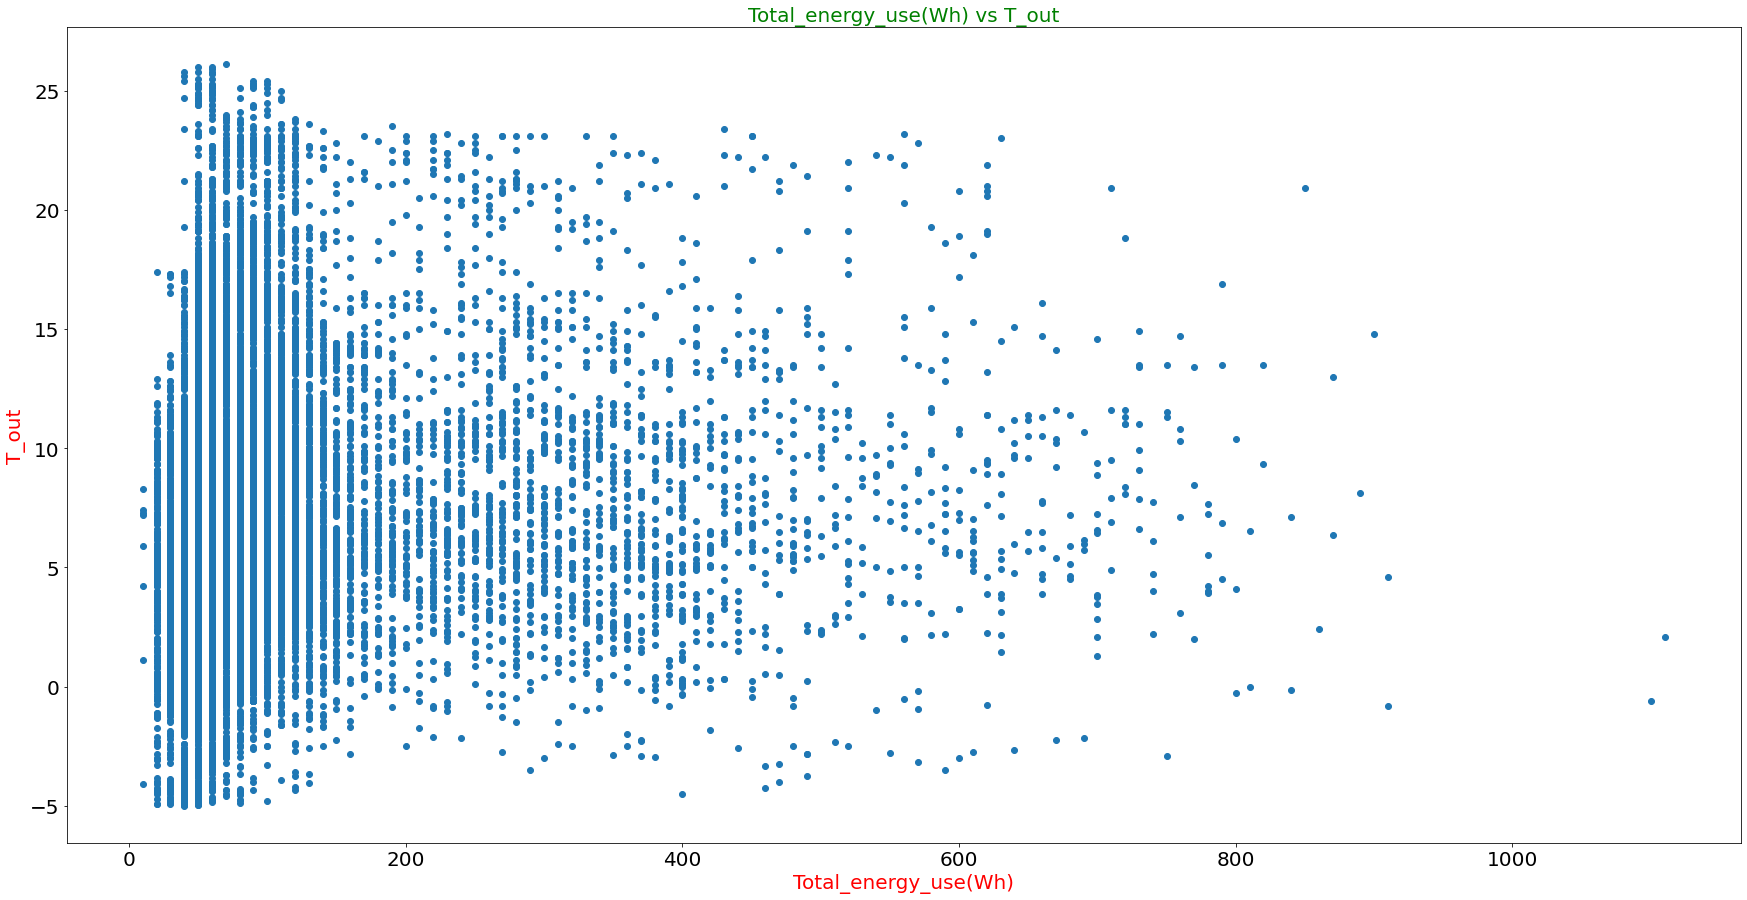

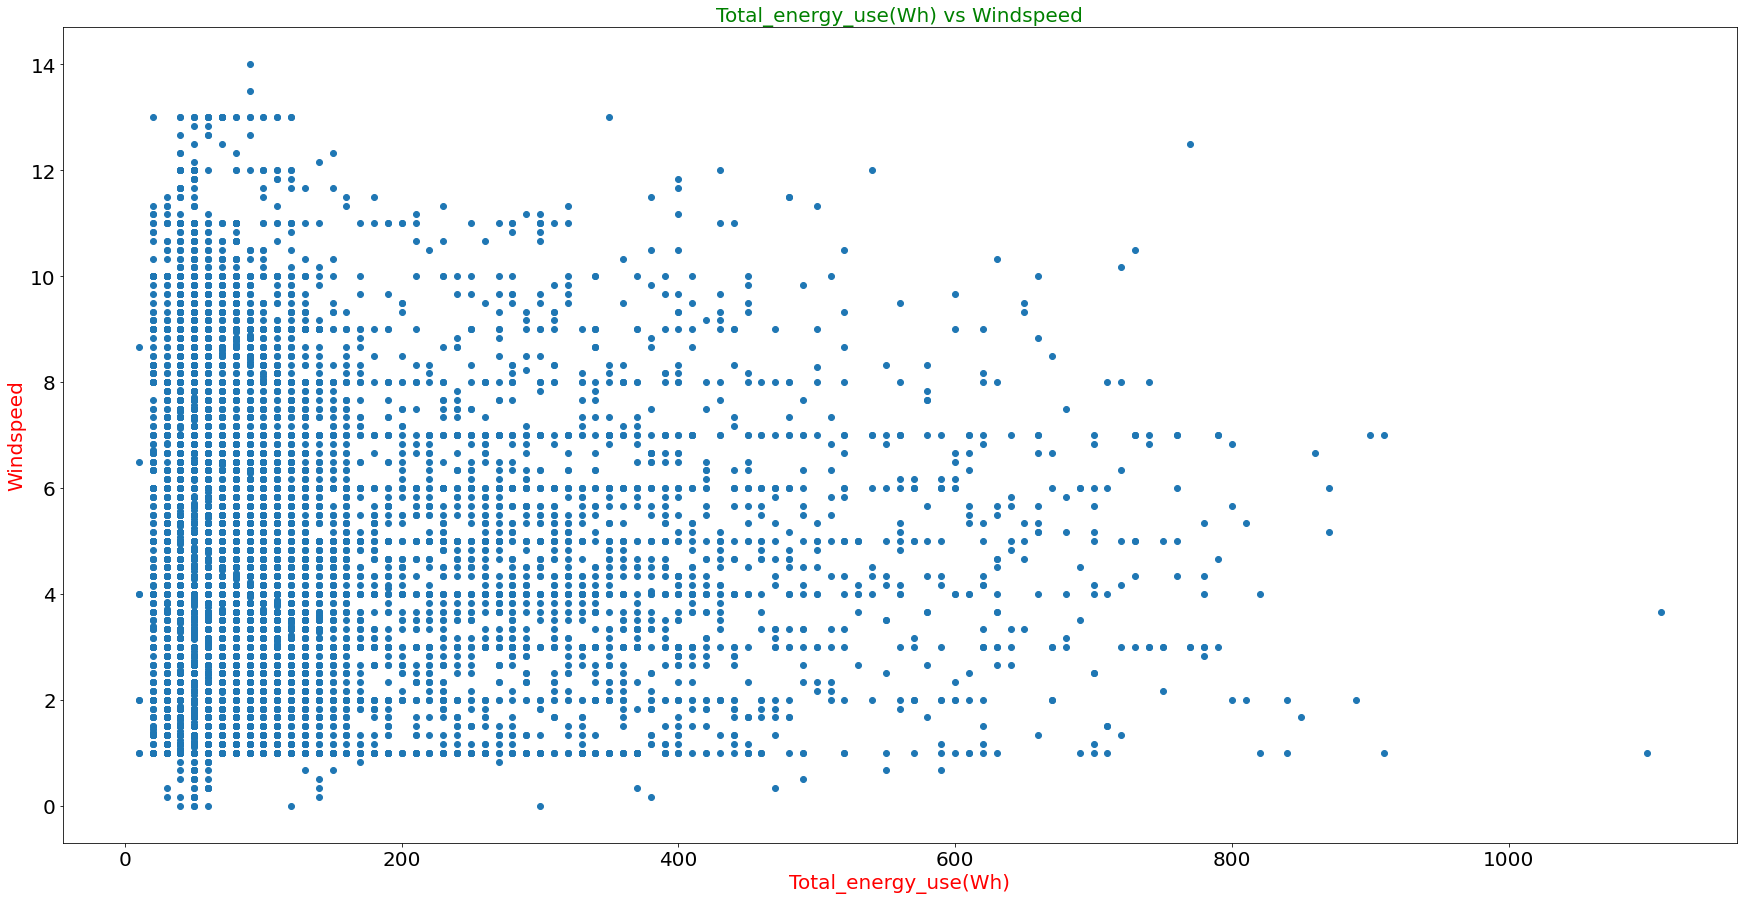

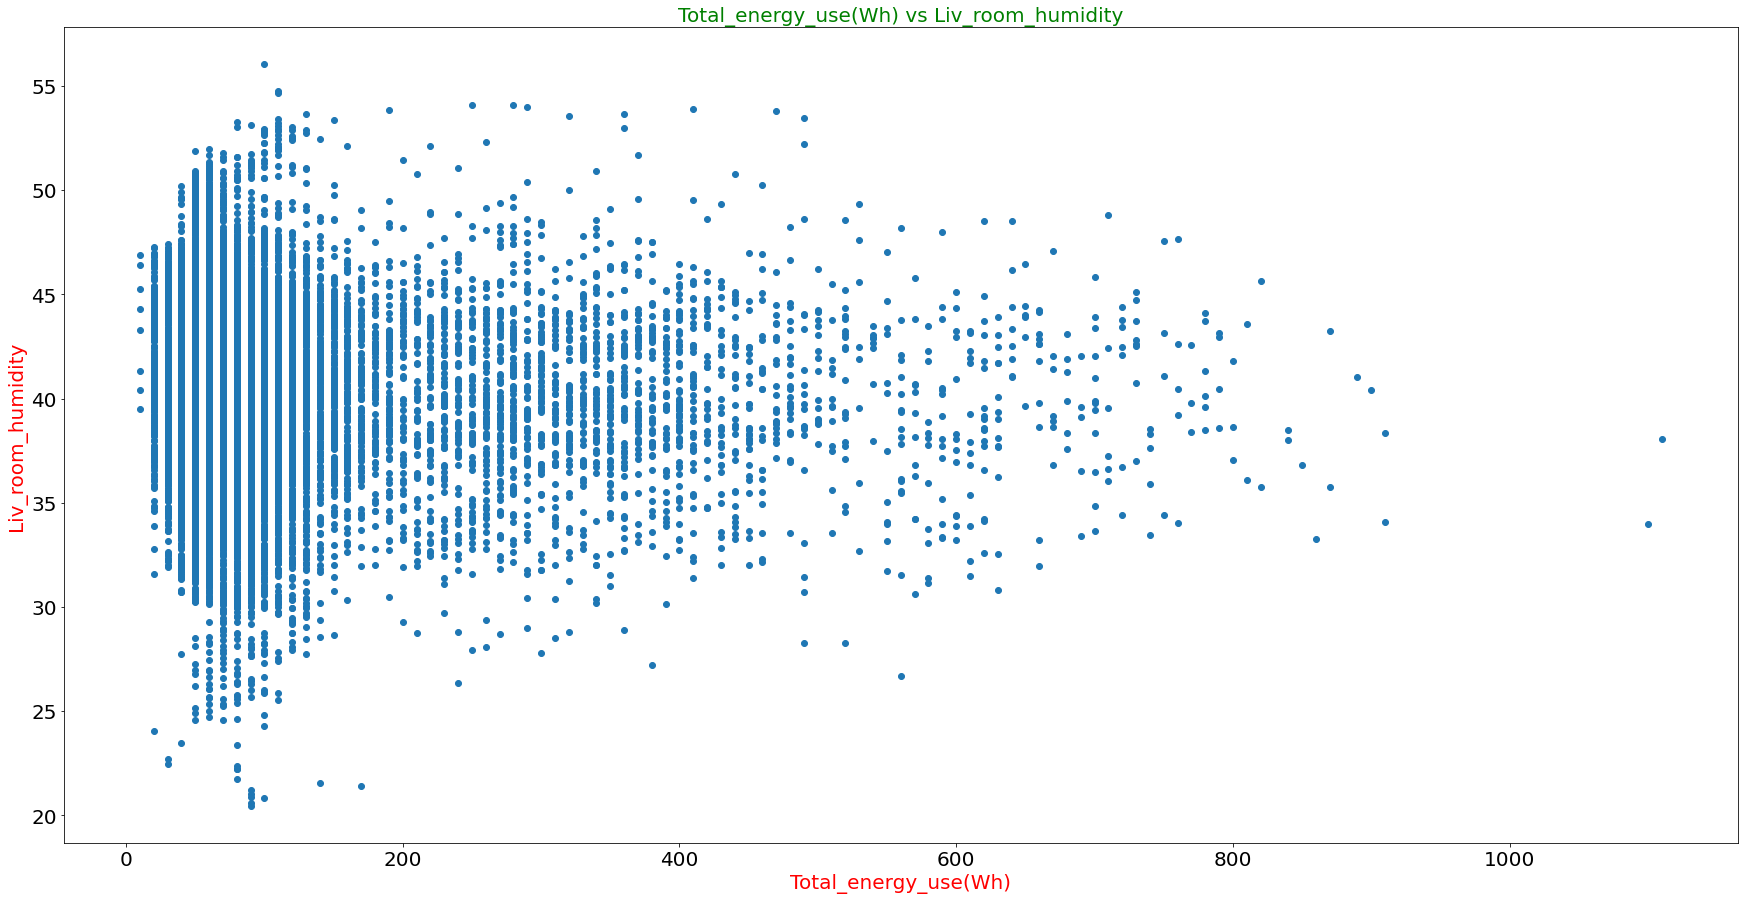

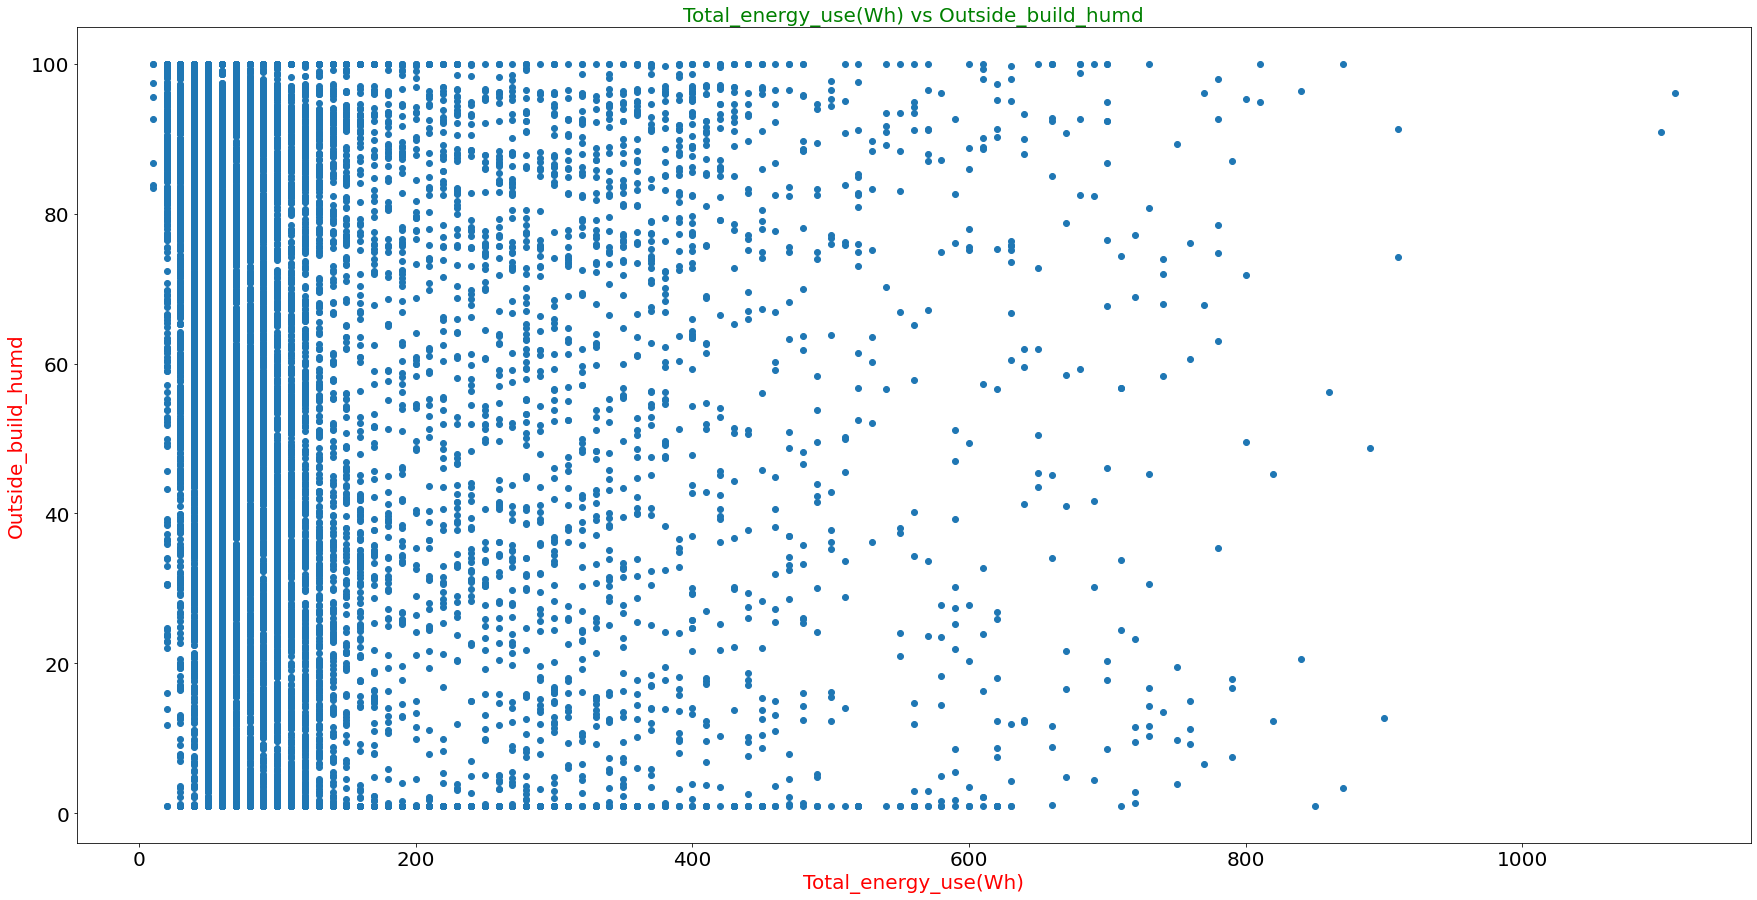

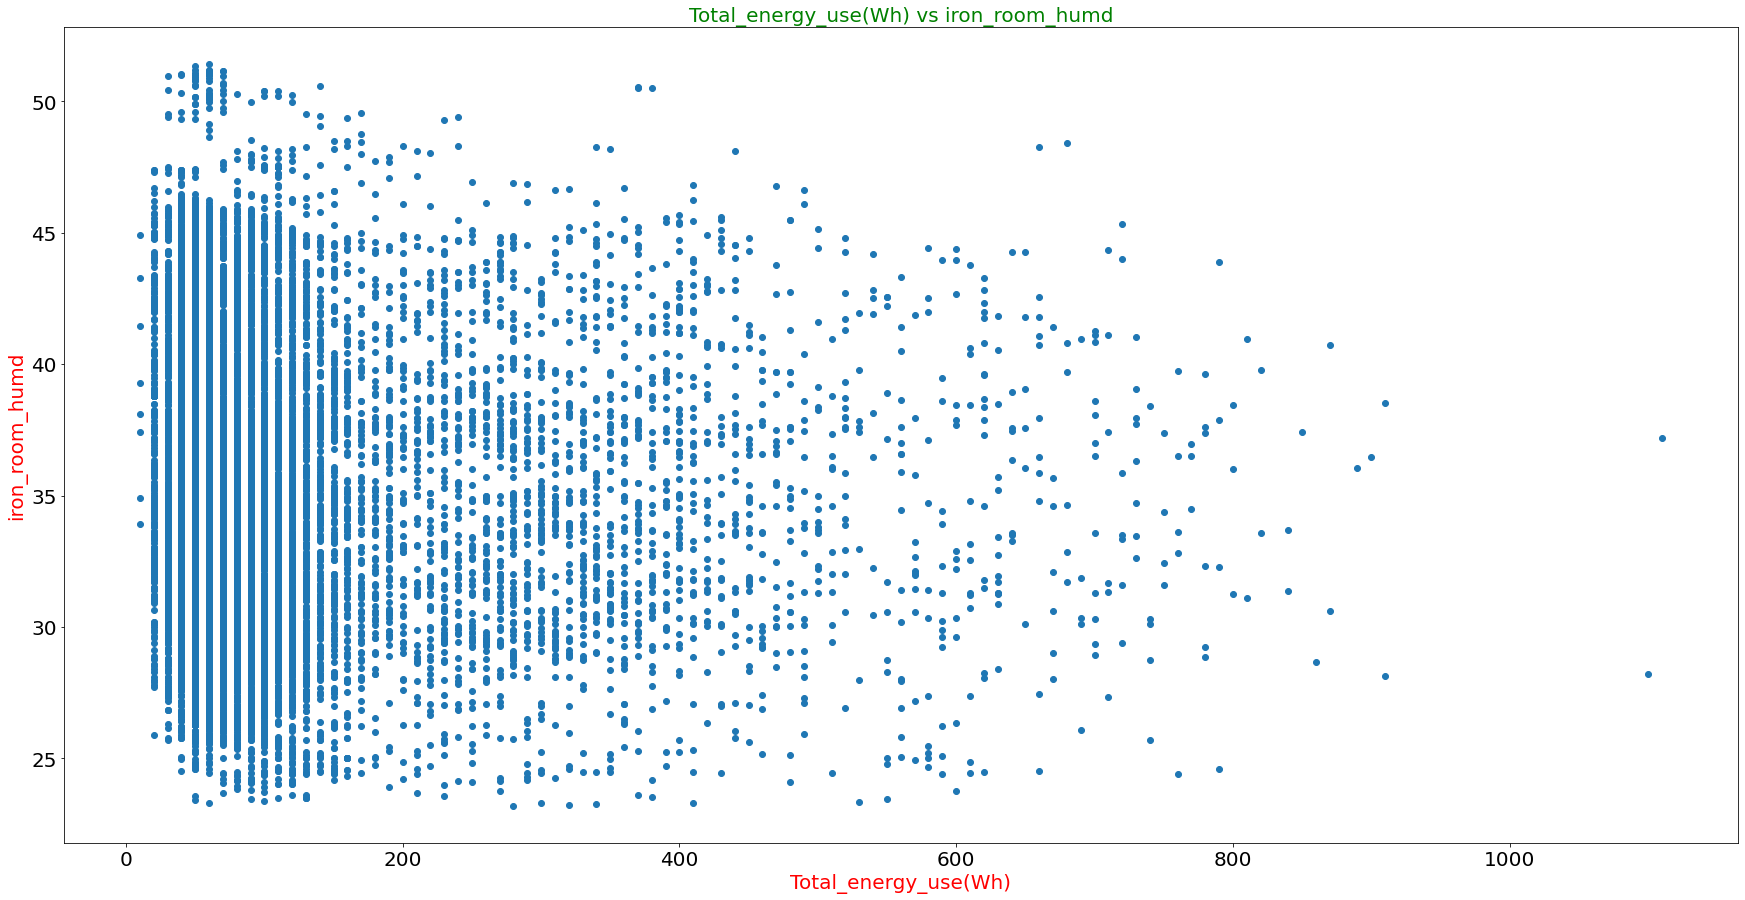

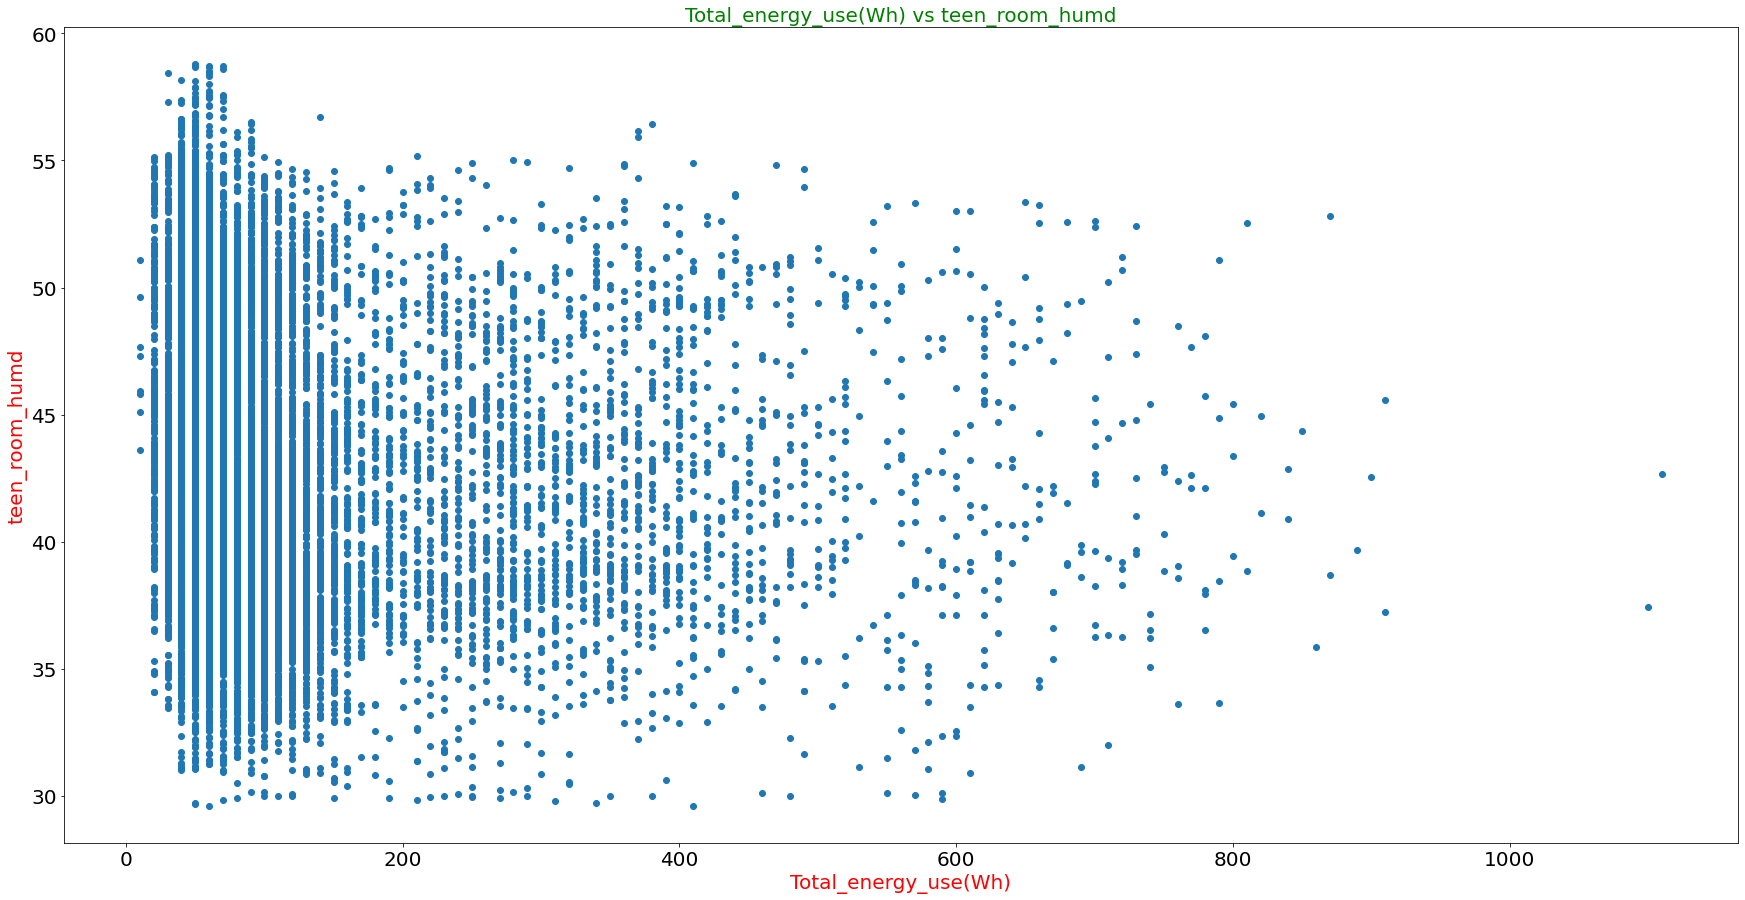

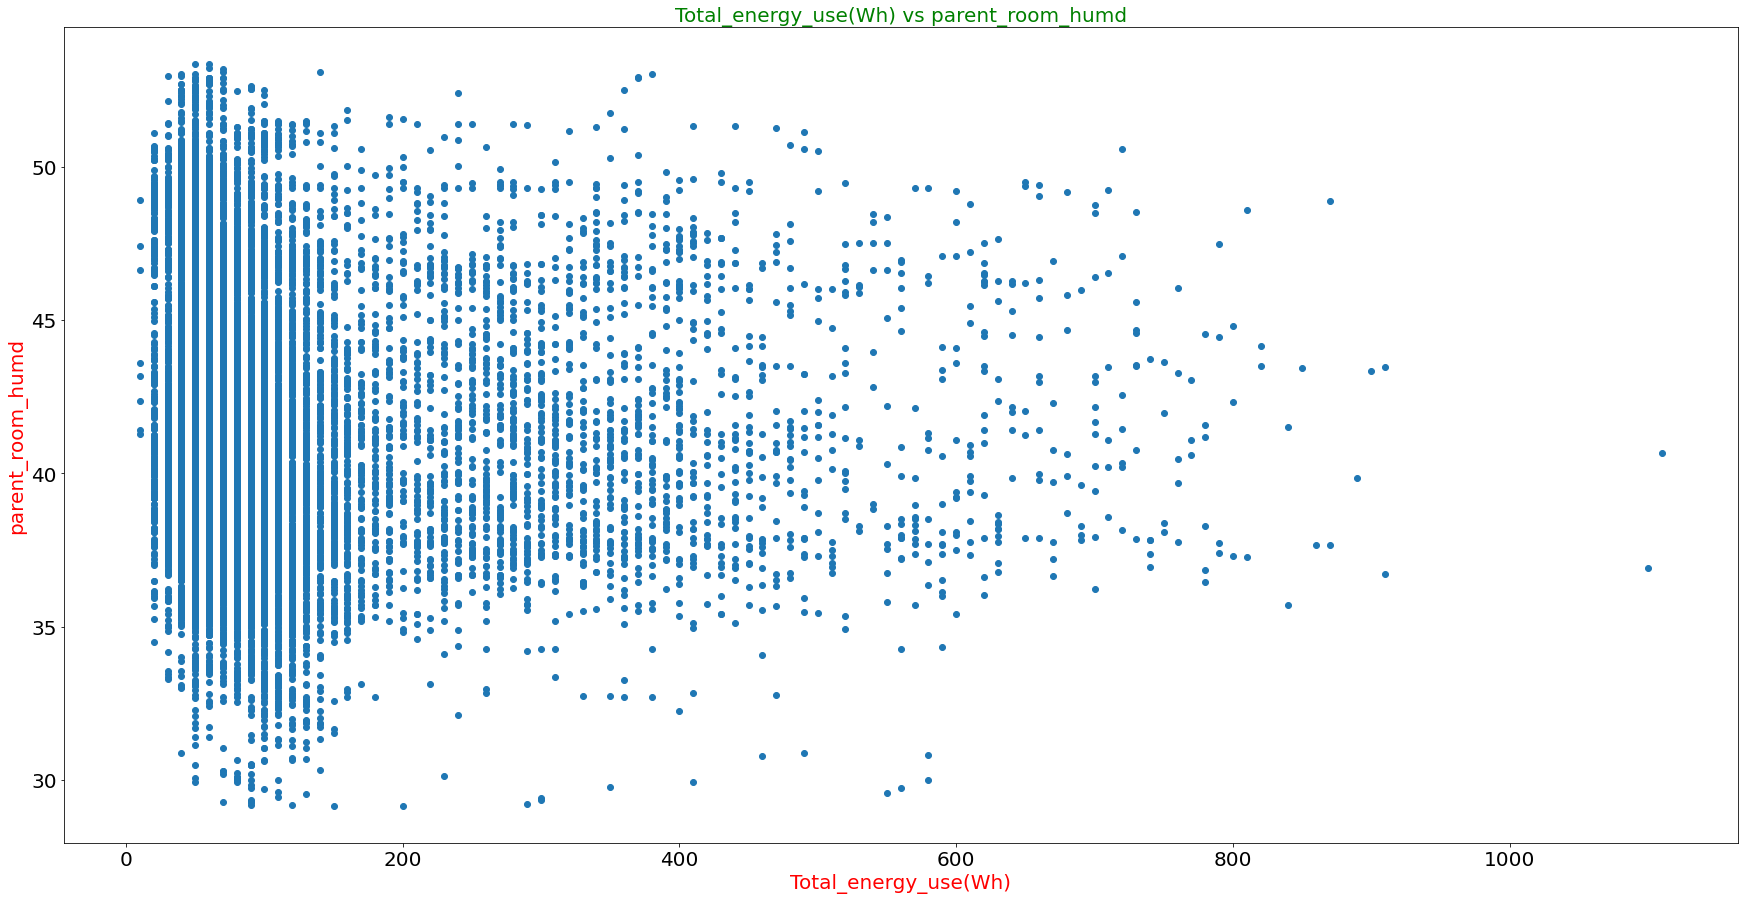

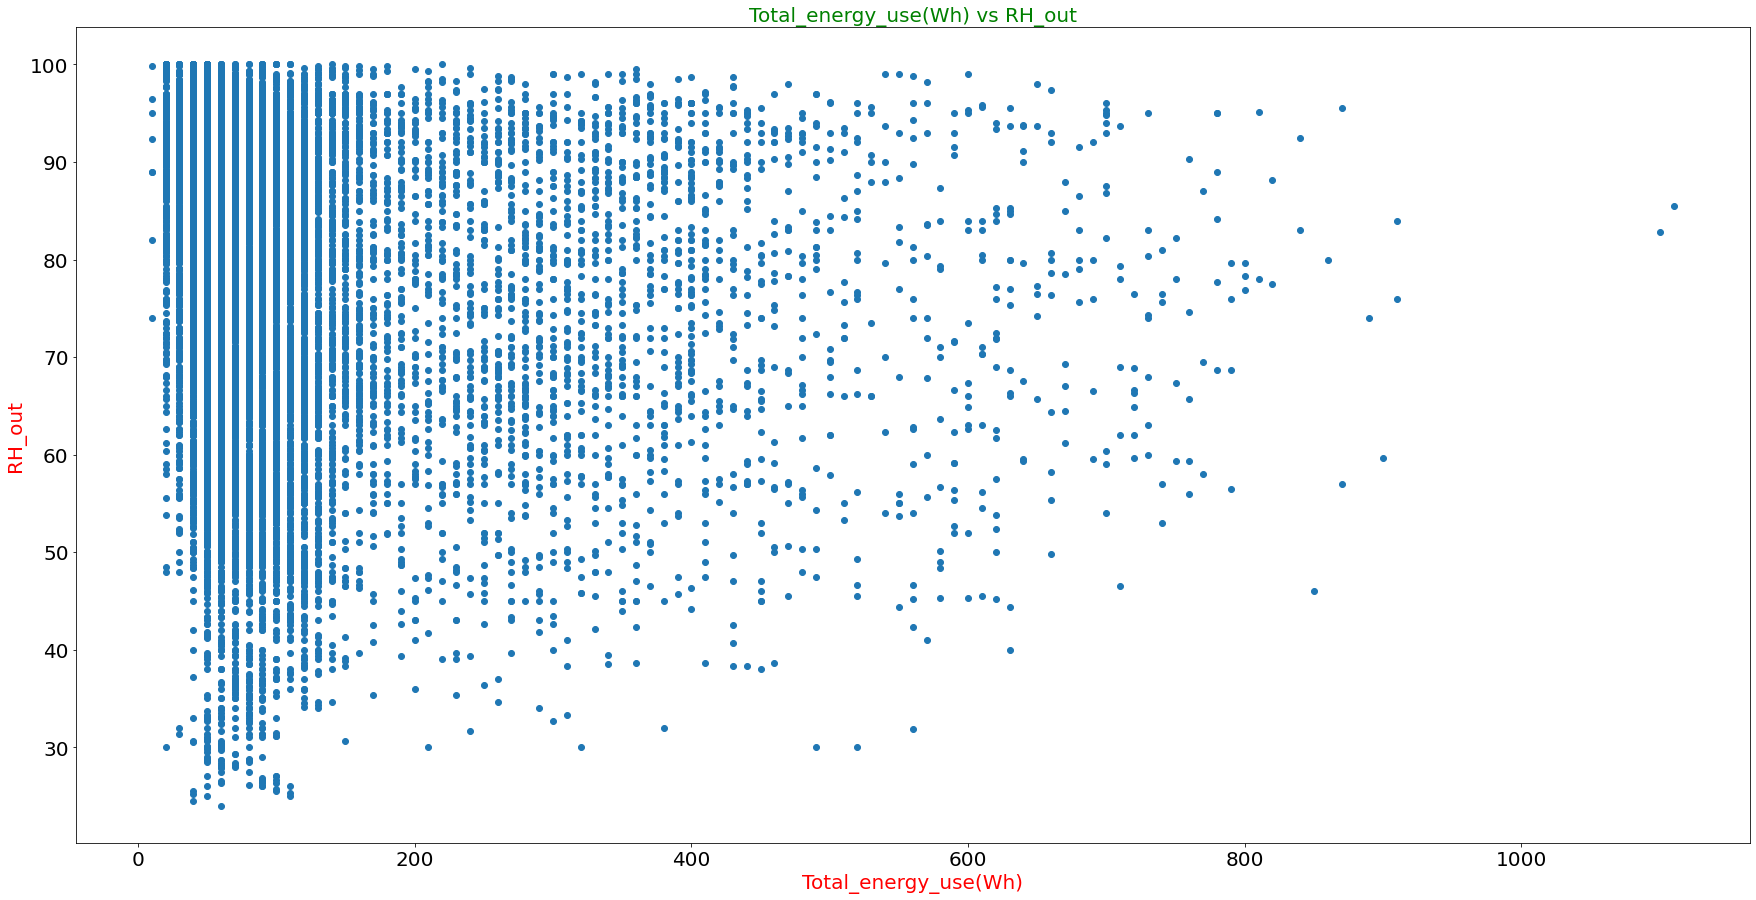

In [ ]:
# Ploting scatter graph  for dependent and independent variables
for elem in col_list:
    y = df_final2[elem]
    x = df_final2['Total_energy_use(Wh)']
    plt.scatter(x,y)
    plt.title(f'Total_energy_use(Wh) vs {elem}', fontsize=20, color='green')
    plt.ylabel(elem, fontsize=20, color='red')
    plt.xlabel('Total_energy_use(Wh)', fontsize=20, color='red')
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (30, 15)
    plt.show()

In [ ]:
# importing modules for prediction
from sklearn import linear_model

['Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp', 'Laundary_room_temp.', 'Outside_build_temp', 'T_out', 'Windspeed', 'Liv_room_humidity', 'Outside_build_humd', 'iron_room_humd', 'teen_room_humd', 'parent_room_humd', 'RH_out']


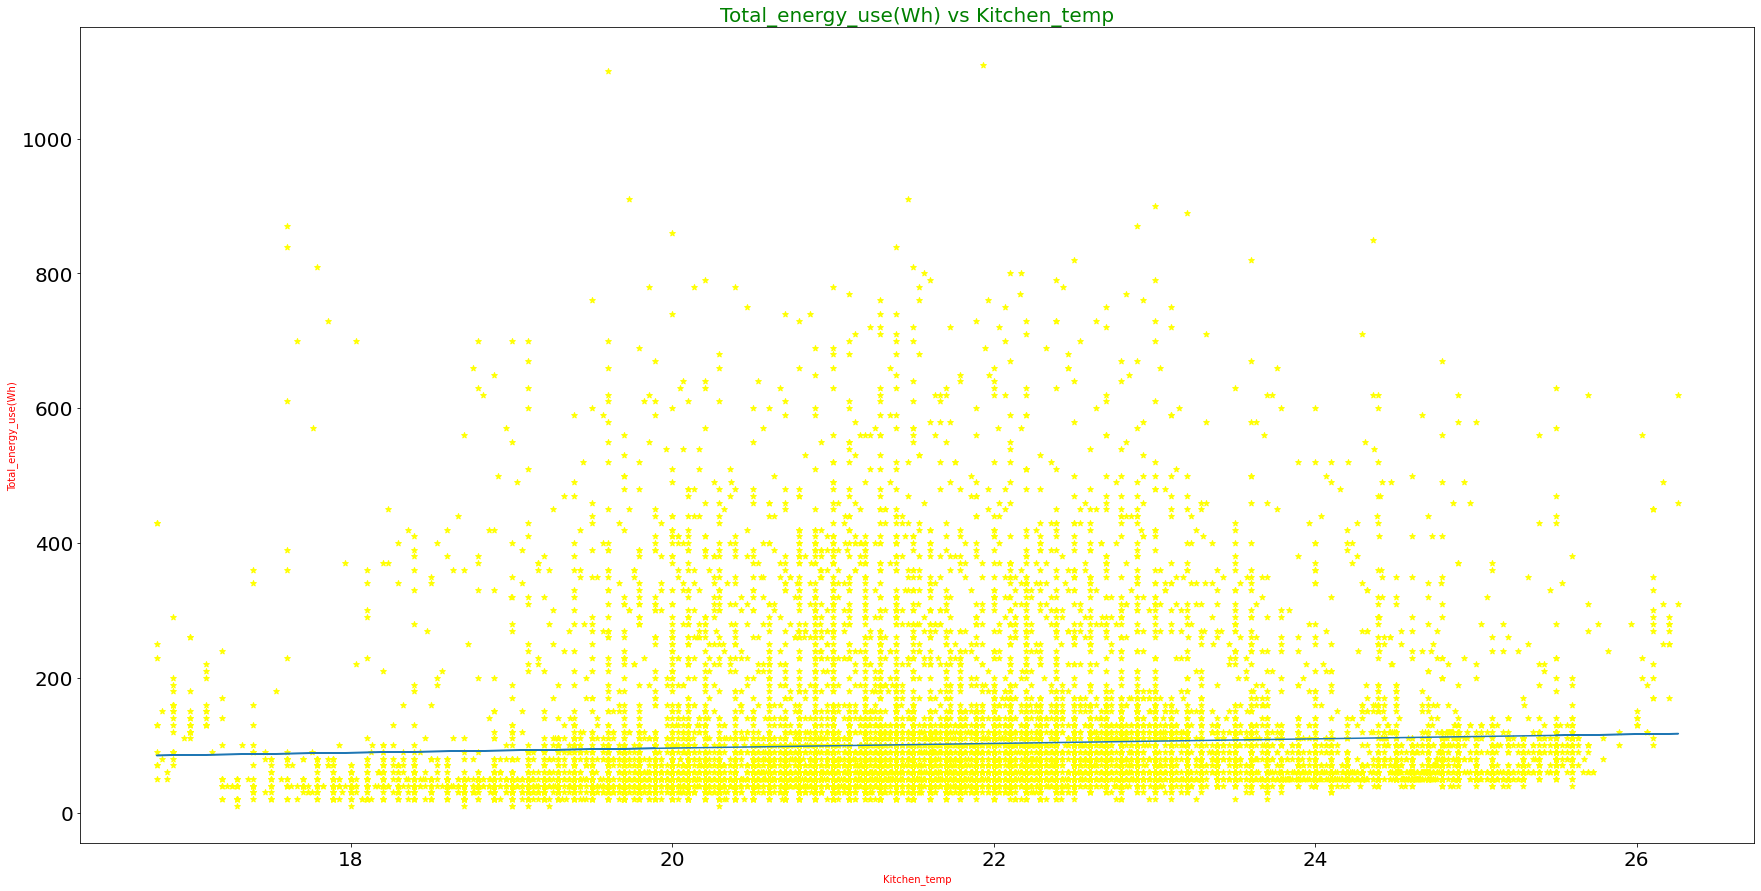

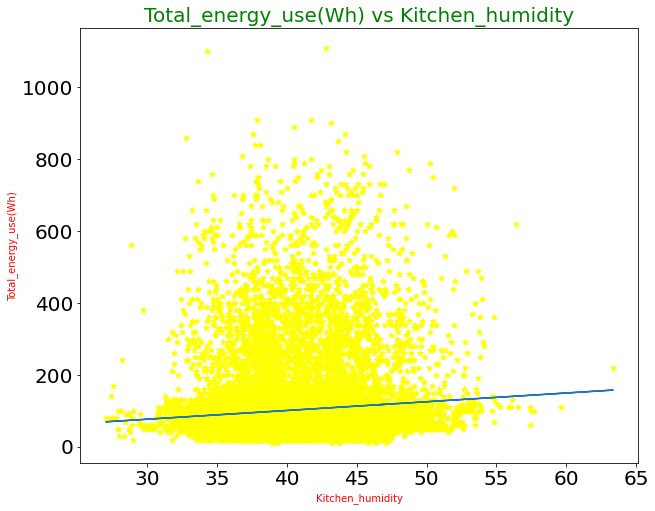

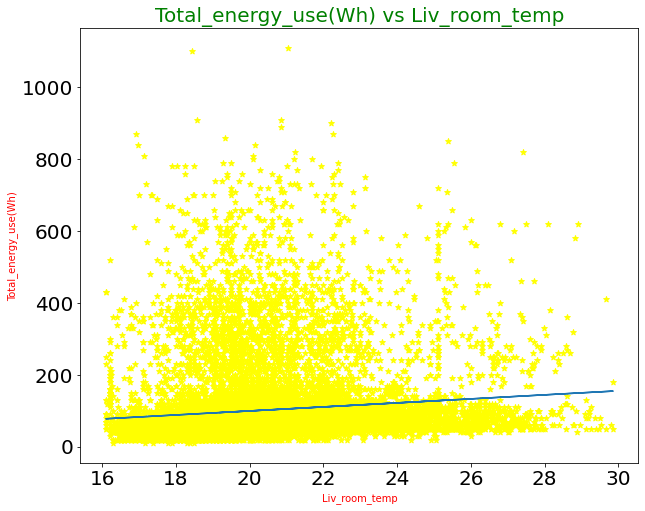

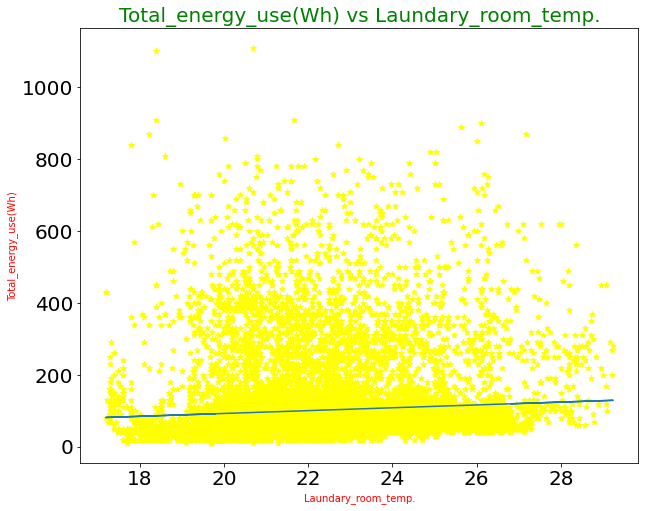

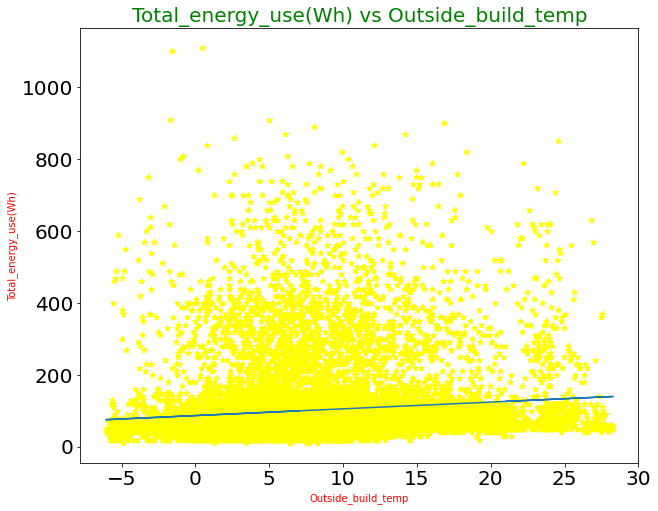

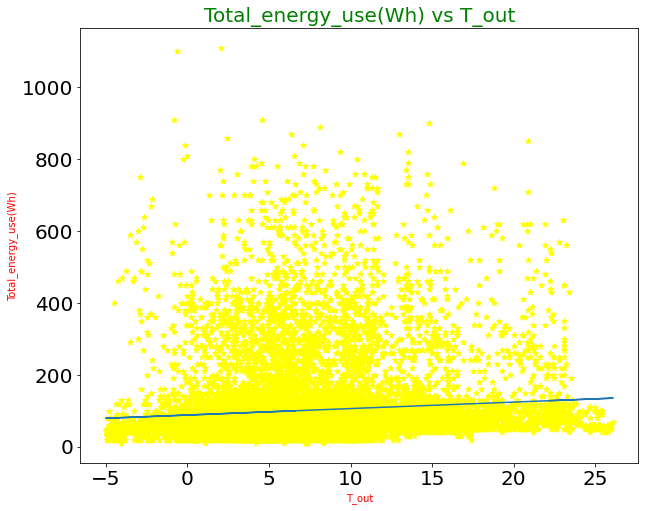

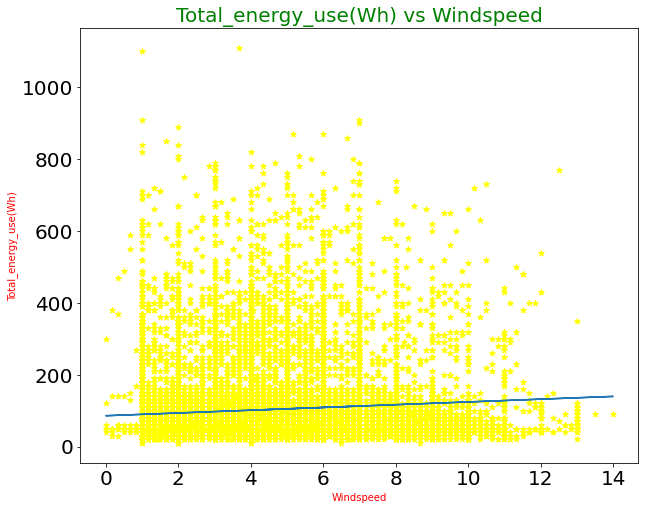

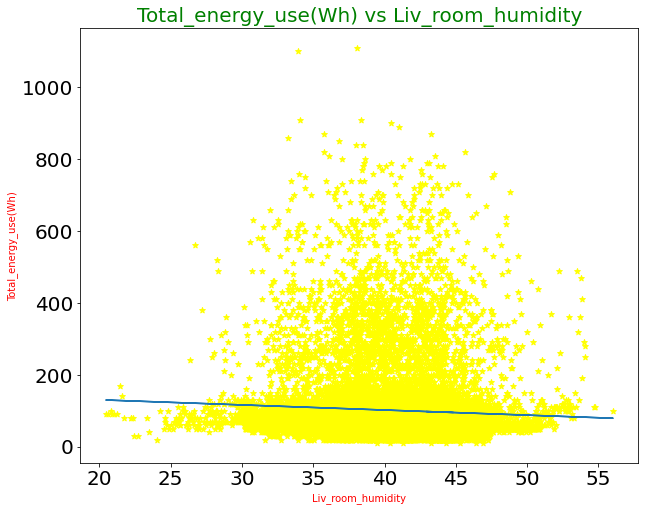

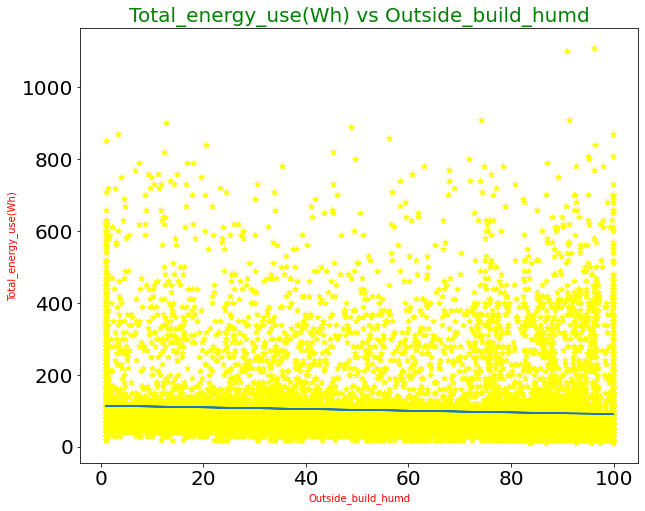

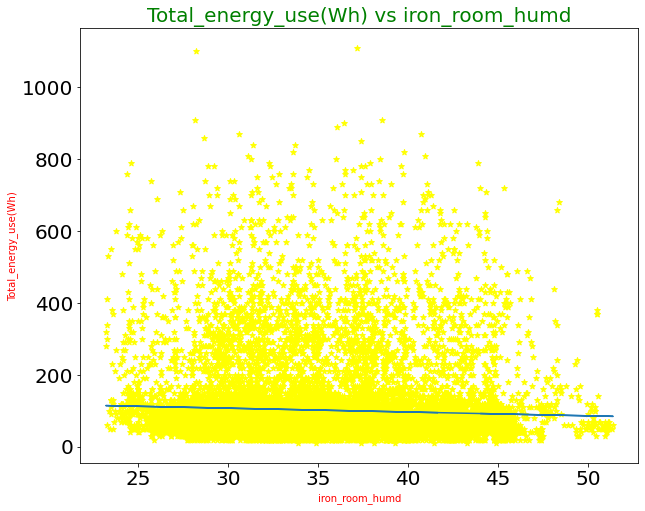

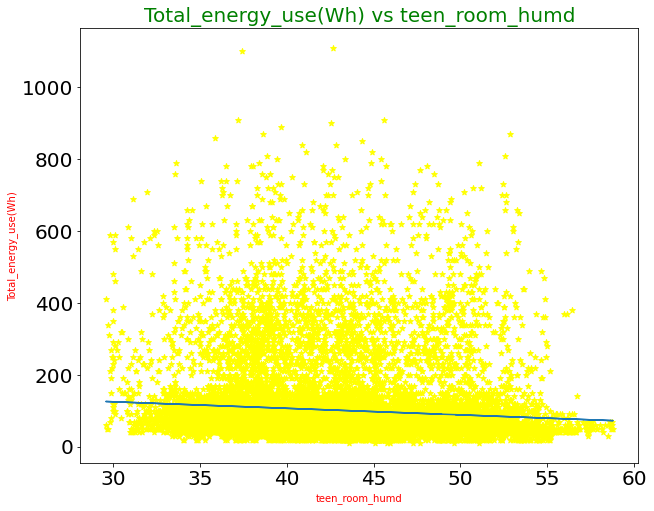

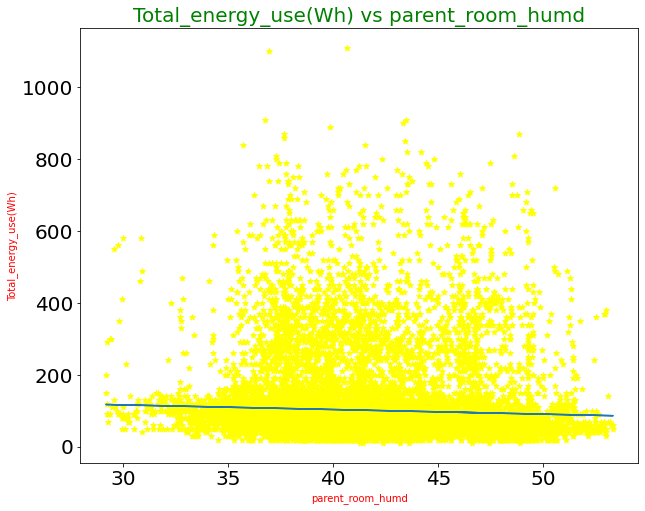

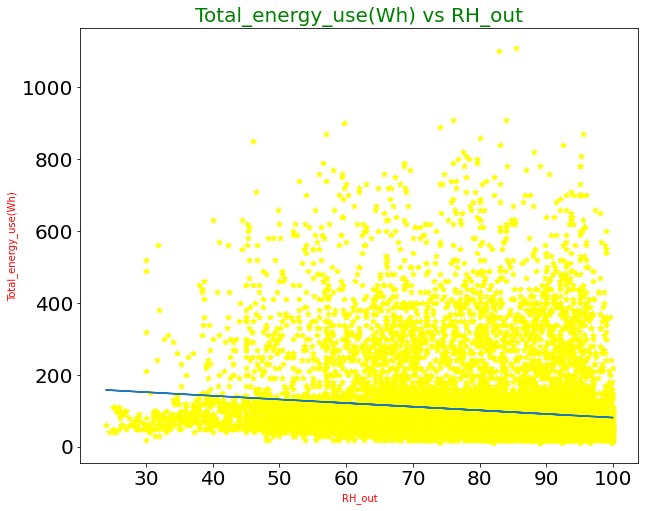

In [ ]:
# Extracting essential columns
col_list = []
for e in list(df_final2.columns):
    col_list.append(e)
list2 = ['Appliances','lights','Total_energy_use(Wh)']
for e in list2:
    col_list.remove(e)    
print(col_list)

for elem in col_list:
    y = df_final2['Total_energy_use(Wh)']
    reg = linear_model.LinearRegression()
    reg.fit(df_final2[[elem]],y)
    plt.title(f'Total_energy_use(Wh) vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Total_energy_use(Wh)', color='red')
    plt.scatter(df_final2[elem],y, color='yellow', marker='*')
    plt.plot(df_final2[elem], reg.predict(df_final2[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

In [ ]:
# splitting in dependent and independent variables
x = df_final2.drop(['Total_energy_use(Wh)','Appliances','lights'], axis=1)
y = df_final2['Total_energy_use(Wh)']

In [ ]:
# perfoming train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

### Linear Regression

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
model1.score(x_test, y_test)

0.12155212347472655

In [ ]:
y_pred = model1.predict(x_test)

Text(0, 0.5, 'predicted set')

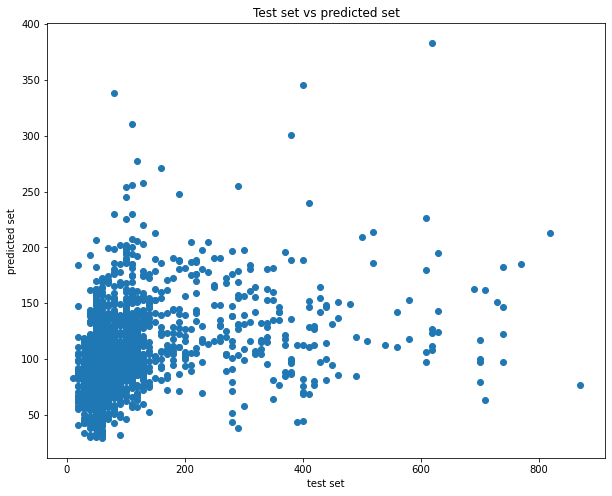

In [ ]:
plt.scatter(y_test,y_pred)
plt.title('Test set vs predicted set')
plt.xlabel('test set')
plt.ylabel('predicted set')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_test, y_test)

0.5666255208548242

In [ ]:
y_pred = rf.predict(x_test)

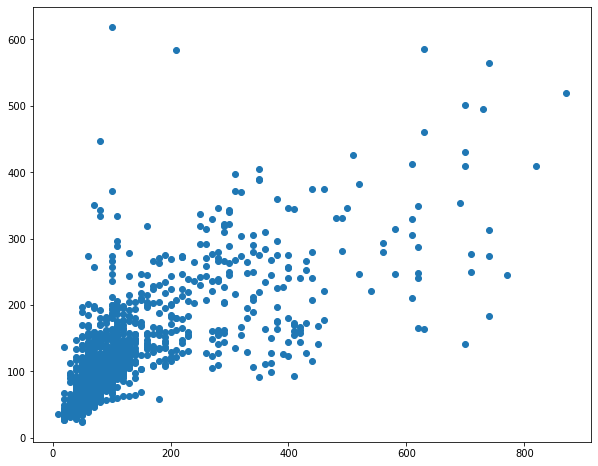

In [ ]:
plt.scatter(y_test,y_pred)